# Part 3 基于舆情数据和技术指标的分类算法预测



## ------引入sentiment舆情变量

In [12]:
import pandas as pd
import numpy as np
import timestring

## section1 数据准备

In [99]:
sentiment=pd.read_csv("sentiment.csv")
sentiment.columns=["Time","sentiment"]


因为爬取的舆情数据只有93天的数据，因此对于原来的技术指标数据，也只能截取相应时间段，并依据日期整合，仅保留交易日的舆情数据

In [100]:
rawdata

,ID,Time,OPEN,CLOSE,HIGH,LOW,MEAN,MA1,MA5,MA20,...,MACD,RSI12,ROC,MTM,K,D,J,response,sentiment,dMean
0,840,2017-02-03 00:00:00,270.10,271.60,271.95,270.10,271.78,271.60,270.78,271.17,...,-0.33,52.57,-0.09,-0.25,43.96,49.30,33.27,0,1,NaN
1,841,2017-02-06 00:00:00,271.30,274.30,274.40,270.25,274.35,274.30,271.09,271.32,...,0.14,58.82,0.75,2.05,60.03,52.88,74.33,1,1,2.57
2,842,2017-02-07 00:00:00,275.15,276.50,276.70,274.60,276.60,276.50,271.92,271.66,...,0.69,63.14,1.94,5.25,72.69,59.48,99.11,1,1,2.25
3,843,2017-02-08 00:00:00,276.35,276.75,277.25,275.85,277.00,276.75,273.35,271.98,...,1.03,63.61,1.39,3.80,80.22,66.39,107.87,1,1,0.40
4,844,2017-02-09 00:00:00,278.70,278.20,279.20,278.05,278.70,278.20,275.47,272.41,...,1.36,66.34,1.31,3.60,84.16,72.31,107.84,1,-1,1.70
5,845,2017-02-10 00:00:00,278.10,275.25,278.85,274.60,277.05,275.25,276.20,272.73,...,1.10,56.86,0.64,1.75,78.95,74.53,87.79,0,-1,-1.65
6,846,2017-02-13 00:00:00,275.60,276.40,277.30,275.30,276.85,276.40,276.62,273.07,...,1.01,59.33,2.11,5.70,78.53,75.86,83.86,0,-1,-0.20
7,847,2017-02-14 00:00:00,276.00,276.00,276.20,274.05,276.10,276.00,276.52,273.29,...,0.83,58.07,1.69,4.60,77.19,76.30,78.95,0,1,-0.75
8,848,2017-02-15 00:00:00,276.60,274.95,276.70,274.00,275.83,274.95,276.16,273.45,...,0.52,54.74,0.81,2.20,69.22,73.94,59.78,0,1,-0.27
9,849,2017-02-16 00:00:00,275.00,276.35,277.15,273.50,276.75,276.35,275.79,273.65,...,0.45,58.23,1.47,4.00,68.87,72.25,62.10,1,1,0.92


In [101]:
rawdata_tech=pd.read_csv("rawdata.csv")
rawdata_tech=rawdata_tech.ix[840:904,:]
from datetime import datetime
t=rawdata_sentiment_tech["Time"]
t
Time=[]
for i in range(65):
    date=timestring.Date(t[840+i],'%y/%b/%d')
    Time.append(date)
rawdata_tech
rawdata_tech["Time"]=Time
rawdata_tech.to_csv("rawdata_tech.csv")
rawdata_tech=pd.read_csv("rawdata_tech.csv")

# we create the new rawdata that combined withe sentiment variable
rawdata= pd.merge(rawdata_tech,sentiment, on=['Time'],
              how='inner')
#rename the data cols
rawdata.columns=["ID","Time","OPEN","CLOSE","HIGH","LOW","MEAN","MA1","MA5","MA20","VOLUME",
                            "MACD","RSI12","ROC","MTM","K","D","J","response","sentiment"]

### 在此之后的流程与Part 1 中相同，但此时我们在分类算法中只采用logistic 回归。
### 并基于60天的历史和舆情数据，训练模型

In [102]:
rawdata["response"]=0
rawdata["dMean"]=rawdata["MEAN"].diff(1)
rawdata.ix[rawdata["dMean"]<0,"response"]=0
rawdata.ix[rawdata["dMean"]>0,"response"]=1

rawdata.ix[rawdata["response"]==-1.05,"response"]=0
rawdata.ix[rawdata["response"]==-0.4,"response"]=0
rawdata.ix[rawdata["response"]==0.05,"response"]=0
rawdata.ix[rawdata["response"]==0.6,"response"]=0
#rawdata.ix[0,"response"]=0
#rawdata.ix[0,"dMean"]=0



#rawdata.ix[0:3,"MA5"]=rawdata.ix[4,"MA5"]
#rawdata.ix[0:18,"MA20"]=rawdata.ix[19,"MA20"]
#rawdata.ix[0,"RSI12"]=rawdata.ix[1,"RSI12"]

train_rawdata=rawdata.ix[0:39,:]
test_rawdata=rawdata.ix[40:60,:]
train_features=train_rawdata.ix[:,["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K","sentiment"]]
train_response=train_rawdata.ix[:,"response"]
test_features=test_rawdata.ix[:,["MA5","MA20","VOLUME","MACD","RSI12","ROC","MTM","K","sentiment"]]
test_response=test_rawdata.ix[:,"response"]




In [103]:
test_features

,MA5,MA20,VOLUME,MACD,RSI12,ROC,MTM,K,sentiment
40,280.60,277.14,178510.0,0.46,51.87,2.24,6.10,63.43,1
41,280.45,277.33,74992.0,0.50,59.31,1.48,4.10,68.06,1
42,280.46,277.57,198064.0,0.48,59.31,1.52,4.20,69.87,1
43,281.04,278.02,294194.0,0.70,64.80,1.81,5.05,70.95,1
44,281.36,278.46,254310.0,0.62,59.72,1.75,4.85,65.69,0
45,282.19,279.05,169940.0,0.58,61.12,1.05,2.95,64.71,1
46,283.11,279.66,316430.0,0.90,68.00,2.18,6.10,71.79,1
47,284.29,280.40,242774.0,1.19,70.39,2.94,8.20,78.30,1
48,285.13,281.16,152170.0,1.35,71.38,2.02,5.70,84.35,0
49,286.13,281.66,196830.0,1.28,69.09,2.13,6.00,80.81,-1


## Section 2 模型算法Logistic

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
             precision    recall  f1-score   support

          0       0.67      0.33      0.44        12
          1       0.47      0.78      0.58         9

avg / total       0.58      0.52      0.50        21

[[4 8]
 [2 7]]


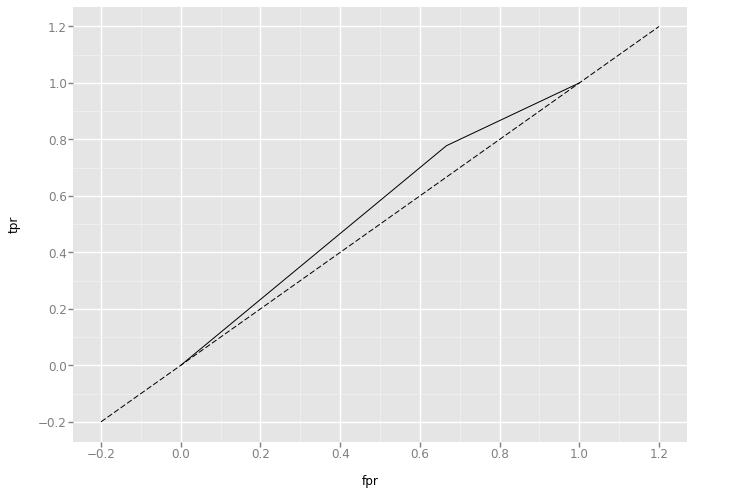

<ggplot: (279621397)>

In [104]:
# Logistic Regression
np.random.seed()
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
model_logist = LogisticRegression()
model_logist.fit(train_features ,train_response)
print(model_logist)

# make predictions
expected = test_response
predicted = model_logist.predict(test_features)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

#ROC curve
from ggplot import *
fpr, tpr, _ = metrics.roc_curve(expected, predicted)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

ggplot(df, aes(x='fpr', y='tpr')) +\
    geom_line() +\
    geom_abline(linetype='dashed')